# Titanic - Machine Learning from Disaster

## But du concours

**Le concours est simple : nous vous demandons d'utiliser les données relatives aux passagers du Titanic (nom, âge, prix du billet, etc.) pour essayer de prédire qui survivra et qui mourra.**

## Compréhension des différentes colonnes

- **PassengerId**: ID passager.
- **Survived**: Si les passager ont survécue ou non. 0 pour Non et 1 pour Oui.
- **Pclass**: Classe du billet. 1 pour 1<sup>ère</sup> classe, 2 pour 2<sup>nd</sup> classe et 3 pour 3<sup>ème</sup> classe.
- **Name**: Nom du passager.
- **Sex**: Sexe du passager.
- **Age**: Âge du passager.
- **Sibsp**: Nombre de frères et soeur / conjoints à bord du Titanic.
- **Parch**: Nombre de parents / enfants à bord du Titanic.
- **Ticket**: Numéro de ticket.
- **Fare**: Tarif passager.
- **Cabin**: Numéro de cabine.
- **Embarked**: Port d'embarquement. C = Cherbourg, Q = Queenstown, S = Southampton.

## 0. Import des librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## 1. Nettoyage des données

### 1.1. On importe nos datasets

#### 1.1.1. Dataset contenant nos données d'entrainements

In [2]:
train_data = pd.read_csv('train.csv')
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
428,429,0,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S


#### 1.1.2. Dataset contenant nos données de test

In [3]:
test_data = pd.read_csv('test.csv')
test_data.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
60,952,3,"Dika, Mr. Mirko",male,17.0,0,0,349232,7.8958,NaN,S
229,1121,2,"Hocking, Mr. Samuel James Metcalfe",male,36.0,0,0,242963,13.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
385,1277,2,"Herman, Miss. Kate",female,24.0,1,2,220845,65.0000,NaN,S
249,1141,3,"Khalil, Mrs. Betros (Zahie Maria"" Elias)""",female,NaN,1,0,2660,14.4542,NaN,C
395,1287,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1,0,13695,60.0000,C31,S
198,1090,2,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,NaN,S
349,1241,2,"Walcroft, Miss. Nellie",female,31.0,0,0,F.C.C. 13528,21.0000,NaN,S
337,1229,3,"Elias, Mr. Joseph",male,39.0,0,2,2675,7.2292,NaN,C


### 1.2. On affiche quelques descriptions rapide de notre dataset d'entrainement

#### 1.2.1. On affiche les informations

*On affiche les informations du dataset notamment pour connaitre le type des colonnes.*

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 1.2.2. On affiche une description syntétique

In [5]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


*Remarque : On peut appercevoir qu'il y a des colonnes où il manque des valeurs.*

#### 1.2.3. On affiche le nombre de lignes et de colonnes

In [6]:
train_data.shape

(891, 12)

*Remarque : On a 891 lignes et 12 colonnes.*

### 1.3. On vérifie les valeurs manquantes

In [7]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*Remarque : On peut remarquer qu'il y a 177 valeurs manquantes dans la colonne **Age**, 687 valeurs manquantes dans la colonne **Cabin** et 2 valeurs manquantes dans la colonne **Embarked**.*

### 1.4. Interprétation des valeurs

#### 1.4.1. Interprétation de l'âge

*Le but est de remplacer les valeurs manquantes par l'âge médian.*

*D'après les consignes de Kaggle, si l'âge est estimé, il doit être au format **xx.5***

In [8]:
age_median = train_data.Age.median() + 0.5 # On rajoute 0.5 pour être conforme aux consignes de Kaggle
print(f"L'âge médian est de : {age_median}")

L'âge médian est de : 28.5


**On remplace les valeurs null par la médianne**

In [9]:
train_data['Age'] = train_data['Age'].fillna(age_median)

**On vérifie s'il y a toujours des valeurs null**

In [10]:
train_data['Age'].isnull().sum()

0

*Remarque : On remarque qu'il n'y a plus de valeurs null.*

**On affiche une courte description de la colonne *Age*.**

In [11]:
train_data[['Age']].describe()

,Age
count,891.000000
mean,29.460909
std,13.010824
min,0.420000
25%,22.000000
50%,28.500000
75%,35.000000
max,80.000000


## 2. Analyse et visualisation des données

### 2.1. Visualisation des nombres de survivants

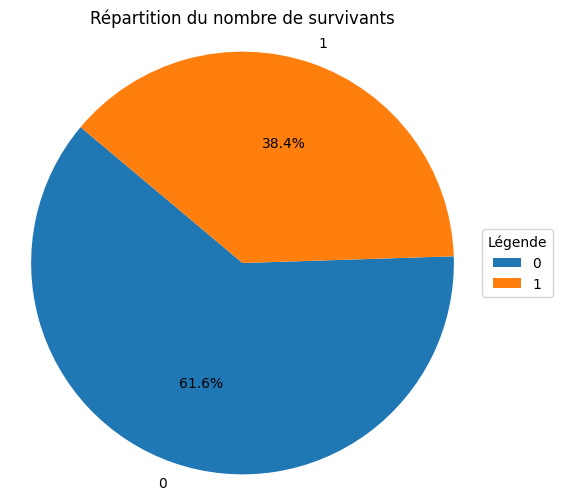

In [12]:
nb_survived = train_data['Survived'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(nb_survived, labels=nb_survived.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition du nombre de survivants')
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

*Interprétation : Il y a 38,4% de personnes qui ont survécues contre 61.6% de personnes qui n'ont pas survécues.*

### 2.2. Visualisation de la répartition hommes/femmes

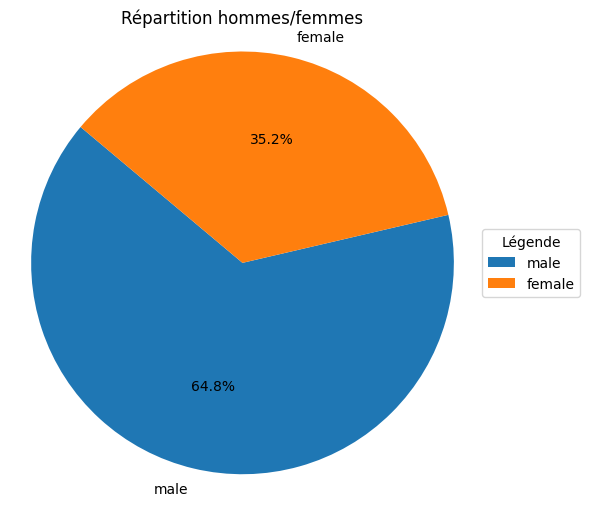

In [13]:
nb_women_men = train_data['Sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(nb_women_men, labels=nb_women_men.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition hommes/femmes')
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

*Interprétation : Il y a 35,2% de femmes et 64,8% d'hommes.*

### 2.3. Visualisation de la répartition de personnes qui ont survécues selon le sexe

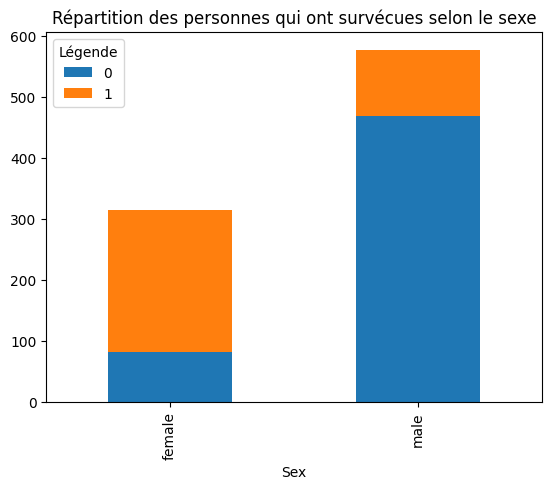

In [14]:
nb_survived_by_sex = train_data.groupby(['Sex', 'Survived']).size().unstack()
nb_survived_by_sex.plot(kind='bar', stacked=True)
plt.title('Répartition des personnes qui ont survécues selon le sexe')
plt.legend(title="Légende")
plt.show()

*Interprétation : Il y a plus de survivants chez les femmes que chez les hommes.*

### 2.4. Visualisation de la répartition des classes de billets

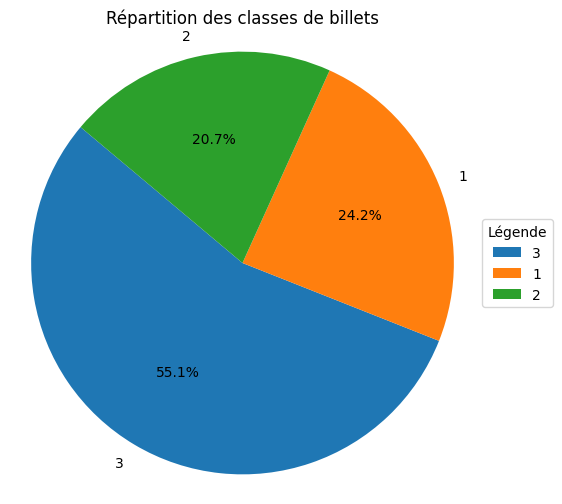

In [15]:
nb_pclass = train_data['Pclass'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(nb_pclass, labels=nb_pclass.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des classes de billets')
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

*Interprétation : Il y a 55,1% de personnes qui sont en 3ème classe, 20,7% en 2nd classe et 24,2% en 1ère classe.*

### 2.5. Visualisation de la répartition des personnes ayant une cabine

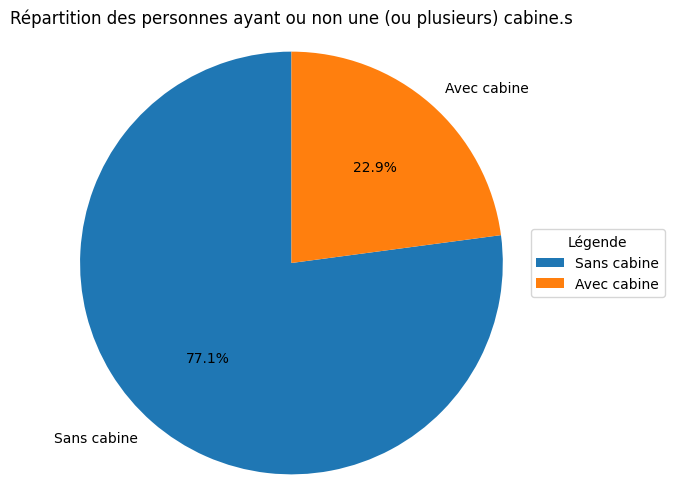

In [25]:
nb_cabin_none = train_data.Cabin.isnull().sum()
nb_cabin_yes = train_data.Cabin.notnull().sum()

plt.figure(figsize=(6, 6))
plt.pie([nb_cabin_none, nb_cabin_yes], labels=['Sans cabine', 'Avec cabine'], autopct='%1.1f%%', startangle=90)
plt.title('Répartition des personnes ayant ou non une (ou plusieurs) cabine.s')
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

*Interprétation : Il y a 77,1% des personnes n'ayant pas de cabine contre 22,9% ayant une ou plusieurs cabines.*

### 2.6. Analyse des prix moyens pour les personnes ayant ou non une ou plusieurs cabine

In [24]:
mean_price_cabin_none = train_data[train_data.Cabin.isnull()]['Fare'].mean()
mean_price_cabine_yes = train_data[train_data.Cabin.notnull()]['Fare'].mean()
print(f"Moyenne de prix pour les personnes n'ayant pas de cabine : {round(mean_price_cabin_none, 2)}")
print(f"Moyenne de prix pour les personnes ayant une ou plusieurs cabines : {round(mean_price_cabine_yes, 2)}")

Moyenne de prix pour les personnes n'ayant pas de cabine : 19.16
Moyenne de prix pour les personnes ayant une ou plusieurs cabines : 76.14


*Interprétation : J'en déduis que les valeurs manquantes dans notre colonne **Cabin** ne sont pas anodine.*

*En effet, la moyenne des prix pour les personnes ayant une ou plusieurs cabines étant plus élevé que les peronnes n'ayant pas de cabine.*

### 2.7. Visualisation de la répartition des mineures et majeures

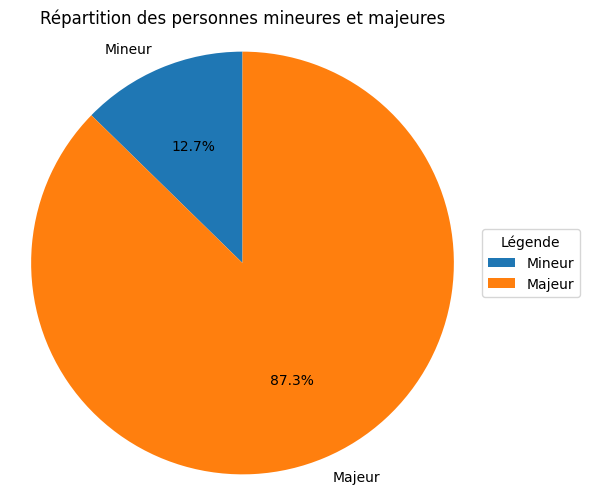

In [27]:
nb_young = train_data[train_data.Age < 18]['Age'].count()
nb_old = train_data[train_data.Age >= 18]['Age'].count()

plt.figure(figsize=(6, 6))
plt.pie([nb_young, nb_old], labels=['Mineur', 'Majeur'], autopct='%1.1f%%', startangle=90)
plt.title('Répartition des personnes mineures et majeures')
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

*Interprétation : 12,7% des personnes sont mineures (moins de 18 ans). Le reste est majeur.*

### 2.8. Visualisation du nombre de personnes selon le port d'embarquement

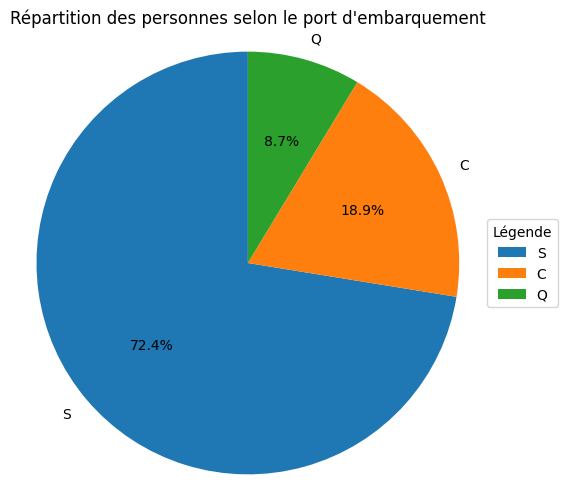

In [28]:
nb_embarked = train_data['Embarked'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(nb_embarked, labels=nb_embarked.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des personnes selon le port d\'embarquement')
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

*Interprétation : La majorité des passagers proviennent du port d'embarquement de Southampton.*

### 2.9. Analyse des valeurs manquantes de la colonne **Embarked**

In [33]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 2.5. Visualisation des corrélation entre les variables

#### 2.5.1. Corrélation de plusieurs variables

In [42]:
columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

correlation = train_data[columns].corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033926,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.066369,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.337477,0.083081,0.018443,-0.549500
Age,0.033926,-0.066369,-0.337477,1.000000,-0.233165,-0.174504,0.095209
SibSp,-0.057527,-0.035322,0.083081,-0.233165,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.174504,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.095209,0.159651,0.216225,1.000000


#### 2.5.2. On visualise la corrélation avec une Heatmap

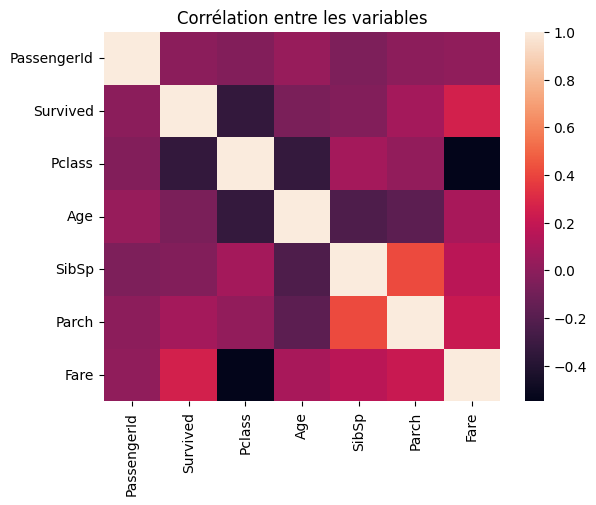

In [43]:
sns.heatmap(correlation)
plt.title('Corrélation entre les variables')
plt.show()

#### 2.5.3. On visualise les corrélations pour chaque variables

##### 2.5.3.1. Corrélation entre **Pclass** et **Fare**

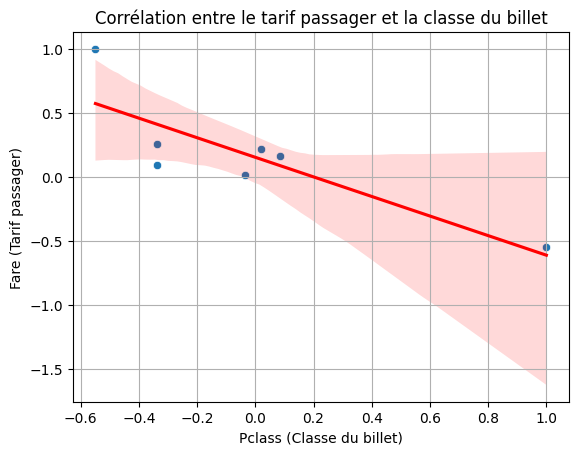

In [51]:
sns.scatterplot(x=correlation['Pclass'], y=correlation['Fare'])
sns.regplot(x=correlation['Pclass'], y=correlation['Fare'], scatter=False, color='red')
plt.title('Corrélation entre le tarif passager et la classe du billet')
plt.xlabel('Pclass (Classe du billet)')
plt.ylabel('Fare (Tarif passager)')
plt.grid(True)
plt.show()

*Interprétation : On voit une corrélation entre le prix du billet et la classe de billet.*

*En effet, le billet est plus cher en 1ère classe qu'en 3ème classe.*

##### 2.5.3.2. Corrélation entre **SibSp** et **Parch**

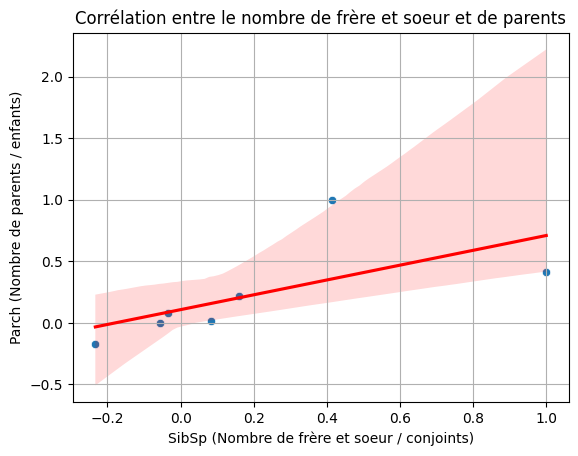

In [52]:
sns.scatterplot(x=correlation['SibSp'], y=correlation['Parch'])
sns.regplot(x=correlation['SibSp'], y=correlation['Parch'], scatter=False, color='red')
plt.title('Corrélation entre le nombre de frère et soeur et de parents')
plt.xlabel('SibSp (Nombre de frère et soeur / conjoints)')
plt.ylabel('Parch (Nombre de parents / enfants)')
plt.grid(True)
plt.show()

##### 2.5.3.3. Corrélation entre **Survived** et **Pclass**

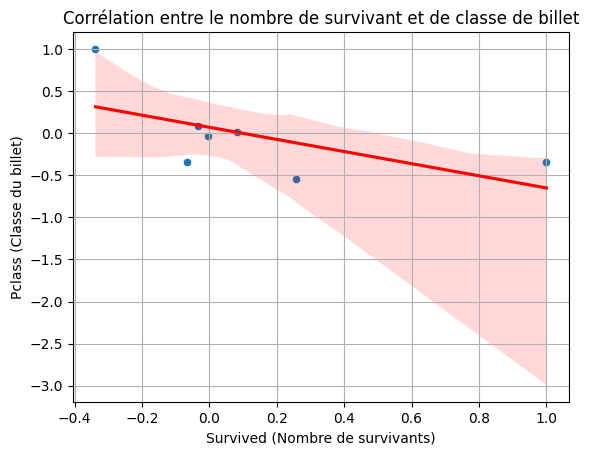

In [57]:
sns.scatterplot(x=correlation['Survived'], y=correlation['Pclass'])
sns.regplot(x=correlation['Survived'], y=correlation['Pclass'], scatter=False, color='red')
plt.title('Corrélation entre le nombre de survivant et de classe de billet')
plt.xlabel('Survived (Nombre de survivants)')
plt.ylabel('Pclass (Classe du billet)')
plt.grid(True)
plt.show()

*Interprétation : On remarque une faible corrélation entre la classe du billet et le nombre de survivant.*

*En effet, il y a plus de survivant en 3ème classe qu'en 1ère classe, étant donné qu'il y a plus de personnes en 3ème classe qu'en 1ère classe.*

##### 2.5.3.4. Corrélation entre **Age** et **Pclass**

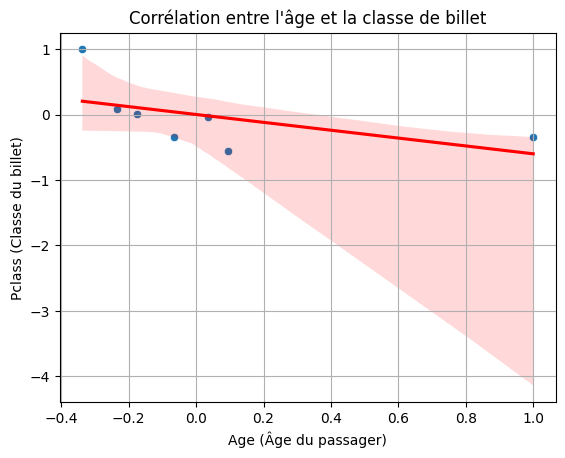

In [83]:
sns.scatterplot(x=correlation['Age'], y=correlation['Pclass'])
sns.regplot(x=correlation['Age'], y=correlation['Pclass'], scatter=False, color='red')
plt.title('Corrélation entre l\'âge et la classe de billet')
plt.xlabel('Age (Âge du passager)')
plt.ylabel('Pclass (Classe du billet)')
plt.grid(True)
plt.show()

*Interprétation : On voit une faible corrélation entre l'âge des passagers et la classe de billet.*

*En effet, il y a plus de "jeune" en 3ème classe qu'en 1ère classe (bien que le corrélation soit assez faible).*

In [15]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
print("% de femmes qui ont survécue :", round(rate_women*100, 2), "%")

% de femmes qui ont survécue : 74.2 %


In [16]:
men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print("% d'hommes qui ont survécue :", round(rate_men*100, 2), "%")

% d'hommes qui ont survécue : 18.89 %


In [17]:
y = train_data['Survived']

features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(train_data[features])
X_text = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_text)

output = pd.DataFrame({"PassengerId": test_data.PassengerId, "Survived": predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
